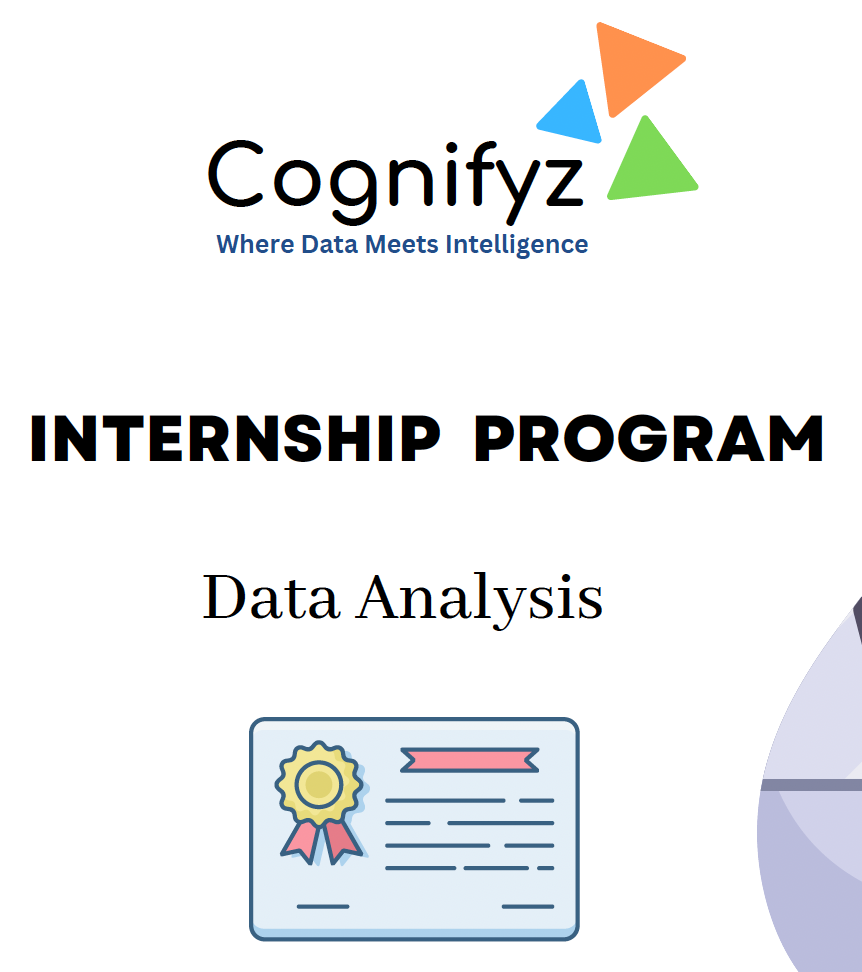

## **LEVEL 2**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


**Loading Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Coding/Dataset .csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (9551, 21)

First few rows:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-

**Data Preprocessing**

In [7]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

print("\n" + "="*100)
print("LEVEL 2 - TASK 1: RESTAURANT RATINGS ANALYSIS")
print("* Analyze the distribution of aggregate ratings and determine the most common rating range.")
print("* Calculate the average number of votes received by restaurants.")
print("="*100)


LEVEL 2 - TASK 1: RESTAURANT RATINGS ANALYSIS
* Analyze the distribution of aggregate ratings and determine the most common rating range.
* Calculate the average number of votes received by restaurants.


**Distribution of ratings**

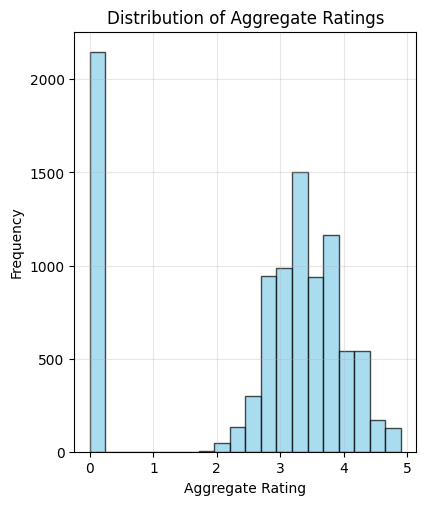

In [8]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
plt.hist(df['Aggregate rating'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

**Rating Range**

Most common rating range: 3-4
Number of restaurants in this range: 4388
Percentage: 45.94%


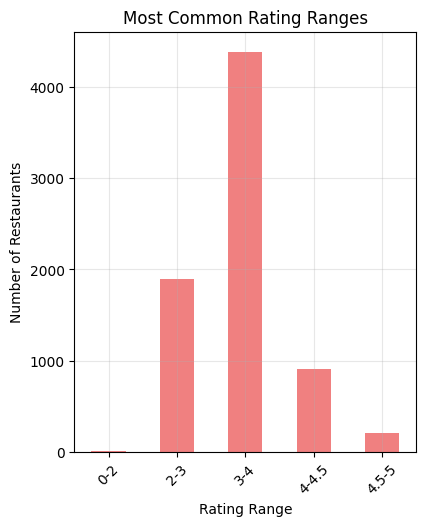

In [9]:
rating_ranges = pd.cut(df['Aggregate rating'].dropna(), bins=[0, 2, 3, 4, 4.5, 5],
                       labels=['0-2', '2-3', '3-4', '4-4.5', '4.5-5'])
rating_range_counts = rating_ranges.value_counts().sort_index()

plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 2)
rating_range_counts.plot(kind='bar', color='lightcoral')
plt.title('Most Common Rating Ranges')
plt.xlabel('Rating Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

most_common_range = rating_range_counts.idxmax()
print(f"Most common rating range: {most_common_range}")
print(f"Number of restaurants in this range: {rating_range_counts.max()}")
print(f"Percentage: {(rating_range_counts.max()/len(df))*100:.2f}%")


**Votes**


Average number of votes received by restaurants: 156.91

Rating Statistics:
Average Rating: 2.67
Median Rating: 3.20
Standard Deviation: 1.52

Votes Statistics:
Average Votes: 156.91
Median Votes: 31.00
Max Votes: 10934
Min Votes: 0


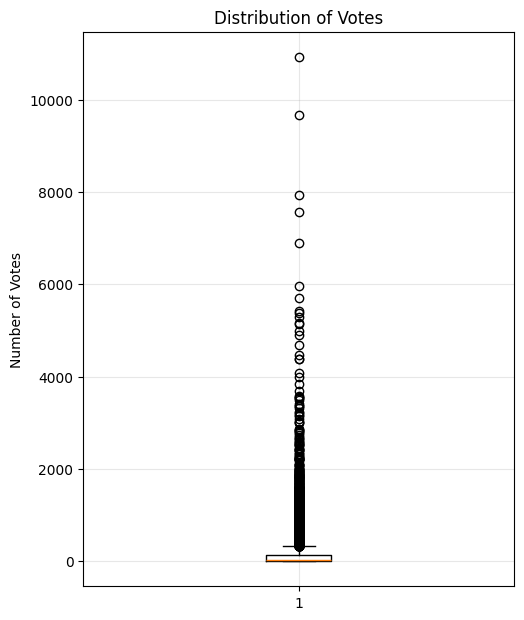


LEVEL 2 - TASK 2: CUISINE COMBINATION ANALYSIS
* Identify the most common combinations ofcuisines in the dataset.
* Determine if certain cuisine combinationstend to have higher ratings.
Top 10 Most Common Cuisine Combinations:
1. Chinese + North Indian: 616 restaurants
2. Mughlai + North Indian: 394 restaurants
3. Chinese + Mughlai + North Indian: 306 restaurants
4. Bakery + Desserts: 181 restaurants
5. Chinese + Fast Food: 159 restaurants
6. Fast Food + Pizza: 142 restaurants
7. Chinese + North Indian + South Indian: 135 restaurants
8. Mithai + Street Food: 134 restaurants
9. Fast Food + North Indian: 120 restaurants
10. Bakery + Fast Food: 117 restaurants


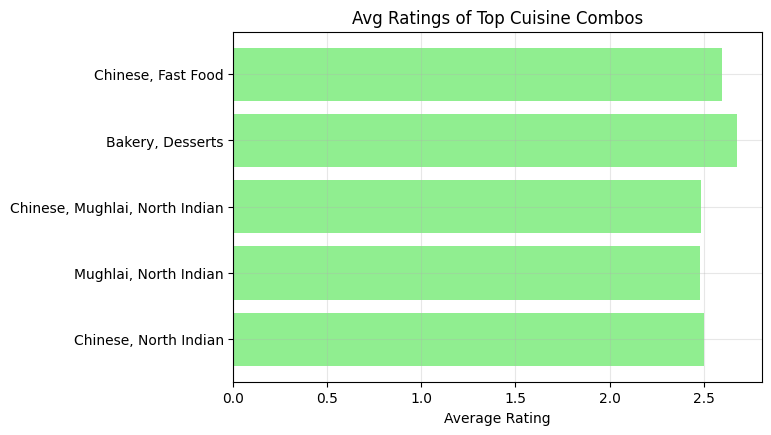

In [10]:
avg_votes = df['Votes'].mean()
print(f"\nAverage number of votes received by restaurants: {avg_votes:.2f}")

plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 3)
plt.boxplot(df['Votes'].dropna())
plt.title('Distribution of Votes')
plt.ylabel('Number of Votes')
plt.grid(True, alpha=0.3)

print("\nRating Statistics:")
print(f"Average Rating: {df['Aggregate rating'].mean():.2f}")
print(f"Median Rating: {df['Aggregate rating'].median():.2f}")
print(f"Standard Deviation: {df['Aggregate rating'].std():.2f}")

print("\nVotes Statistics:")
print(f"Average Votes: {df['Votes'].mean():.2f}")
print(f"Median Votes: {df['Votes'].median():.2f}")
print(f"Max Votes: {df['Votes'].max()}")
print(f"Min Votes: {df['Votes'].min()}")

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("LEVEL 2 - TASK 2: CUISINE COMBINATION ANALYSIS")
print("* Identify the most common combinations ofcuisines in the dataset.")
print("* Determine if certain cuisine combinationstend to have higher ratings.")
print("="*100)

df['Cuisines'] = df['Cuisines'].fillna('Unknown')
cuisine_combinations = []
for cuisines in df['Cuisines']:
    if cuisines != 'Unknown':
        combo = [c.strip() for c in cuisines.split(',')]
        if len(combo) > 1:
            cuisine_combinations.append(tuple(sorted(combo)))

combo_counter = Counter(cuisine_combinations)
top_10_combos = combo_counter.most_common(10)
print("Top 10 Most Common Cuisine Combinations:")
for i, (combo, count) in enumerate(top_10_combos, 1):
    print(f"{i}. {' + '.join(combo)}: {count} restaurants")

plt.figure(figsize=(15, 10))
combo_ratings = {}
for combo, _ in top_10_combos:
    combo_str = ', '.join(combo)
    mask = df['Cuisines'].str.contains('|'.join(combo), na=False)
    combo_ratings[combo_str] = df[mask]['Aggregate rating'].mean()

plt.subplot(2, 2, 1)
combo_names = list(combo_ratings.keys())[:5]
combo_rating_values = [combo_ratings[name] for name in combo_names]
plt.barh(range(len(combo_names)), combo_rating_values, color='lightgreen')
plt.yticks(range(len(combo_names)), combo_names)
plt.xlabel('Average Rating')
plt.title('Avg Ratings of Top Cuisine Combos')
plt.grid(True, alpha=0.3)

**Single Vs Combo Rating**


Top 10 Single Cuisines:
1. North Indian: 936 restaurants
2. Chinese: 354 restaurants
3. Fast Food: 354 restaurants
4. Cafe: 299 restaurants
5. Bakery: 218 restaurants
6. Street Food: 149 restaurants
7. South Indian: 112 restaurants
8. Mughlai: 103 restaurants
9. Ice Cream: 74 restaurants
10. Mithai: 71 restaurants

Avg rating - Single Cuisines: 2.23
Avg rating - Combo Cuisines: 2.91


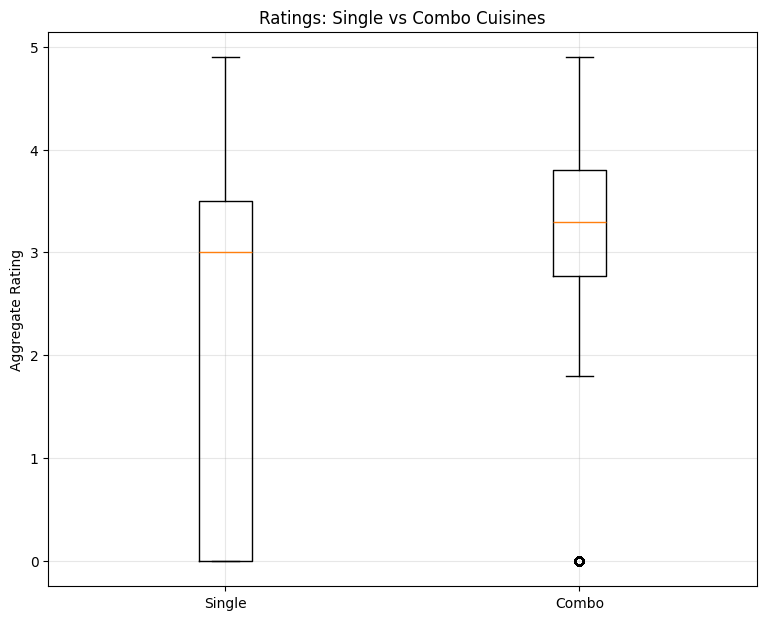


LEVEL 2 - TASK 3: GEOGRAPHIC ANALYSIS
* Plot the locations of restaurants on a map using longitude and latitude coordinates.
* Identify any patterns or clusters of restaurants in specific areas.
Restaurants with coordinates: 9551
Latitude: -41.330428 to 55.97698
Longitude: -157.948486 to 174.8320893
Top 10 Cities by Restaurant Count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [11]:
single_cuisines = []
for cuisines in df['Cuisines']:
    combo = [c.strip() for c in cuisines.split(',')]
    if len(combo) == 1:
        single_cuisines.extend(combo)

top_single_cuisines = Counter(single_cuisines).most_common(10)
print("\nTop 10 Single Cuisines:")
for i, (cuisine, count) in enumerate(top_single_cuisines, 1):
    print(f"{i}. {cuisine}: {count} restaurants")

single_ratings = []
combo_ratings_list = []
for cuisines, rating in zip(df['Cuisines'], df['Aggregate rating']):
    if pd.notna(rating):
        combo = [c.strip() for c in cuisines.split(',')]
        if len(combo) == 1:
            single_ratings.append(rating)
        elif len(combo) > 1:
            combo_ratings_list.append(rating)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.boxplot([single_ratings, combo_ratings_list], labels=['Single', 'Combo'])
plt.title('Ratings: Single vs Combo Cuisines')
plt.ylabel('Aggregate Rating')
plt.grid(True, alpha=0.3)

print(f"\nAvg rating - Single Cuisines: {np.mean(single_ratings):.2f}")
print(f"Avg rating - Combo Cuisines: {np.mean(combo_ratings_list):.2f}")
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("LEVEL 2 - TASK 3: GEOGRAPHIC ANALYSIS")
print("* Plot the locations of restaurants on a map using longitude and latitude coordinates.")
print("* Identify any patterns or clusters of restaurants in specific areas.")
print("="*100)

geo_df = df.dropna(subset=['Latitude', 'Longitude'])
print(f"Restaurants with coordinates: {len(geo_df)}")
print(f"Latitude: {geo_df['Latitude'].min()} to {geo_df['Latitude'].max()}")
print(f"Longitude: {geo_df['Longitude'].min()} to {geo_df['Longitude'].max()}")

city_counts = geo_df['City'].value_counts().head(10)
print("Top 10 Cities by Restaurant Count:")
print(city_counts)

**Scatter Plot**

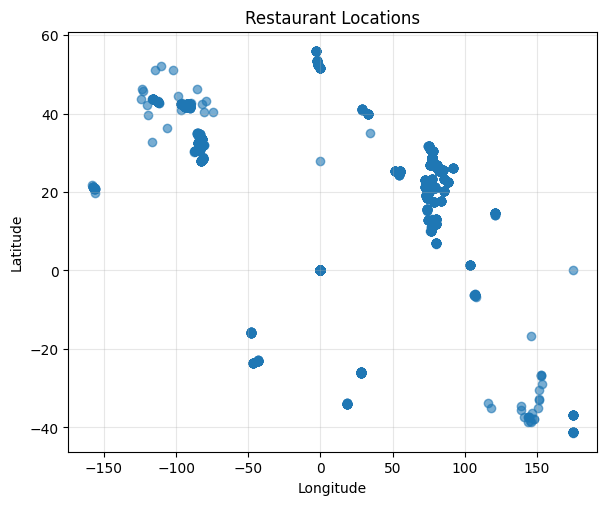

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.scatter(geo_df['Longitude'], geo_df['Latitude'], alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations')
plt.grid(True, alpha=0.3)

**Bar Plot**

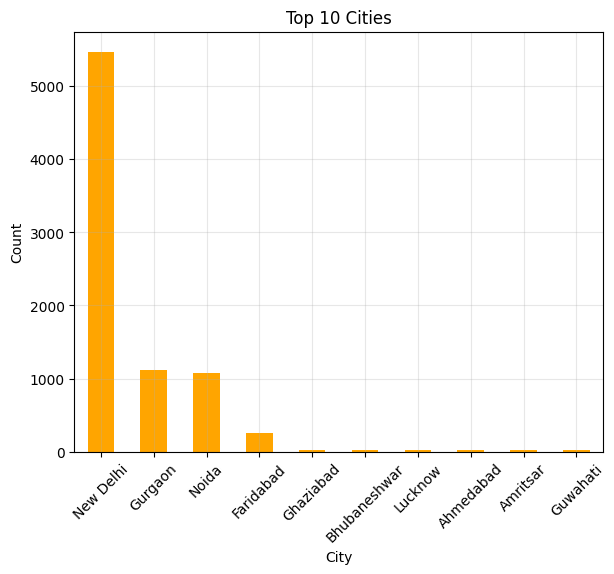

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
city_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Cities')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(True, alpha=0.3)


**Price** **Range**

Text(0.5, 1.0, 'Price Range by Location')

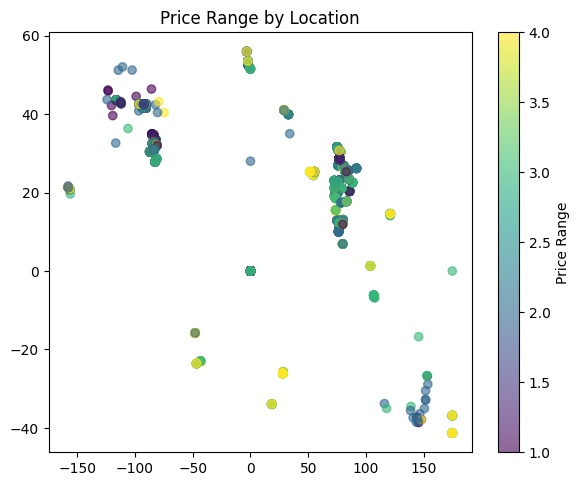

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 3)
scatter = plt.scatter(geo_df['Longitude'], geo_df['Latitude'],
                      c=geo_df['Price range'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.title('Price Range by Location')


**Ratings**

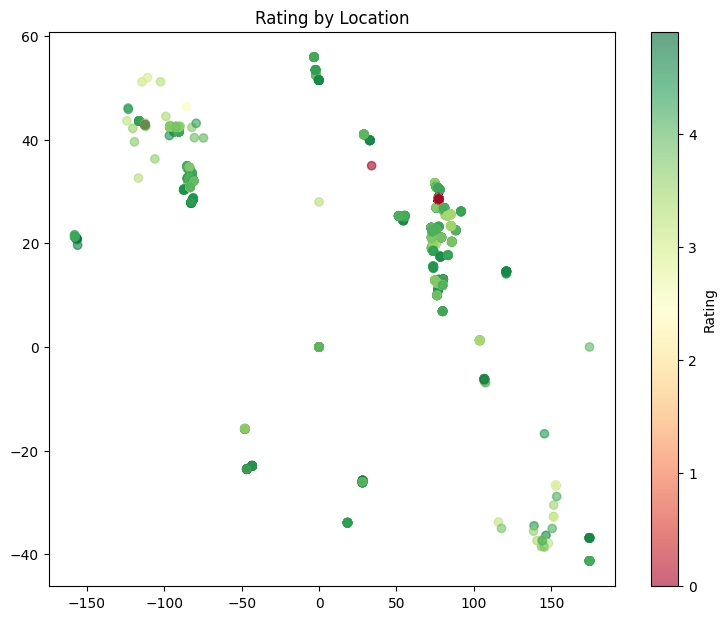

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 4)
scatter = plt.scatter(geo_df['Longitude'], geo_df['Latitude'],
                      c=geo_df['Aggregate rating'], cmap='RdYlGn', alpha=0.6)
plt.colorbar(scatter, label='Rating')
plt.title('Rating by Location')

plt.tight_layout()
plt.show()

**KMeans Clustering**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

coords = geo_df[['Latitude', 'Longitude']].values
coords_scaled = StandardScaler().fit_transform(coords)
kmeans = KMeans(n_clusters=5, random_state=42)
geo_df['Cluster'] = kmeans.fit_predict(coords_scaled)

print("\nClustering Results:")
for cluster in range(5):
    subset = geo_df[geo_df['Cluster'] == cluster]
    print(f"Cluster {cluster}: {len(subset)} restaurants")
    print(f"  Avg Rating: {subset['Aggregate rating'].mean():.2f}")
    print(f"  Top City: {subset['City'].mode().iloc[0] if not subset['City'].mode().empty else 'N/A'}")

print("\n" + "="*100)
print("LEVEL 2 - TASK 4: RESTAURANT CHAINS ANALYSIS")
print("* Identify if there are any restaurant chains present in the dataset.")
print("* Analyze the ratings and popularity of different restaurant chains.")
print("="*100)

name_counts = df['Restaurant Name'].value_counts()
potential_chains = name_counts[name_counts > 1]
top_chains = potential_chains.head(15)
print("Top 15 Potential Chains:")
print(top_chains)

df['Is_Chain'] = df['Restaurant Name'].isin(potential_chains.index)
chain_ratings = df[df['Is_Chain']]['Aggregate rating'].dropna()
indep_ratings = df[~df['Is_Chain']]['Aggregate rating'].dropna()
print(f"\nChain Avg Rating: {chain_ratings.mean():.2f}")
print(f"Independent Avg Rating: {indep_ratings.mean():.2f}")

print("\n---------> Analysis complete <--------")
print ("               Thank You")


Clustering Results:
Cluster 0: 8293 restaurants
  Avg Rating: 2.61
  Top City: New Delhi
Cluster 1: 556 restaurants
  Avg Rating: 1.76
  Top City: New Delhi
Cluster 2: 518 restaurants
  Avg Rating: 4.01
  Top City: Albany
Cluster 3: 64 restaurants
  Avg Rating: 4.04
  Top City: Auckland
Cluster 4: 120 restaurants
  Avg Rating: 3.99
  Top City: Bras�_lia

LEVEL 2 - TASK 4: RESTAURANT CHAINS ANALYSIS
* Identify if there are any restaurant chains present in the dataset.
* Analyze the ratings and popularity of different restaurant chains.
Top 15 Potential Chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Giani's             22
Barista             22
Dunkin' Donuts      22
Pind Balluchi       20
Costa Coffee        20
Name: count, dtype: int64

Chain Avg Rating: 2.79
Independent Avg Rating